<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LoanTap - Logistic Regression

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, poisson,expon, geom, binom, ttest_1samp, ttest_ind, ttest_rel, chi2,chi2_contingency, chi2, chisquare, f_oneway, levene, shapiro, kruskal
import math
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import MinMaxScaler


In [ ]:
!gdown 1gphGlkdXE-JndY_B1rqYv-KaHrC1VkyM

Downloading...
From: https://drive.google.com/uc?id=1gphGlkdXE-JndY_B1rqYv-KaHrC1VkyM
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 49.1MB/s]


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv("/content/logistic_regression.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Data dictionary:


* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

In [ ]:
print('No of rows: ',df.shape[0])
print('No of columns: ',df.shape[1])

No of rows:  396030
No of columns:  27


##EDA

In [ ]:
df['loan_status'].value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


In [ ]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394274,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48816,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(exclude='number')

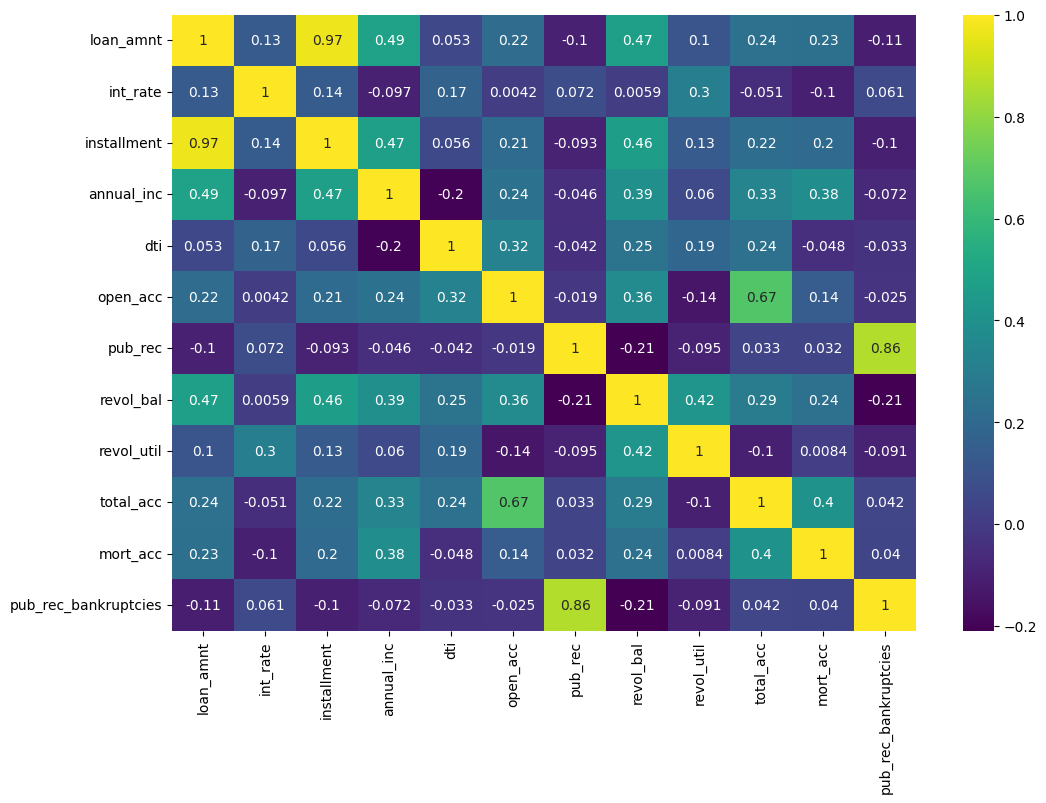

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

Insights:
* loan amount and installment has strong relation


In [ ]:
# let drops installment
df_num.drop('installment',axis=1,inplace=True)

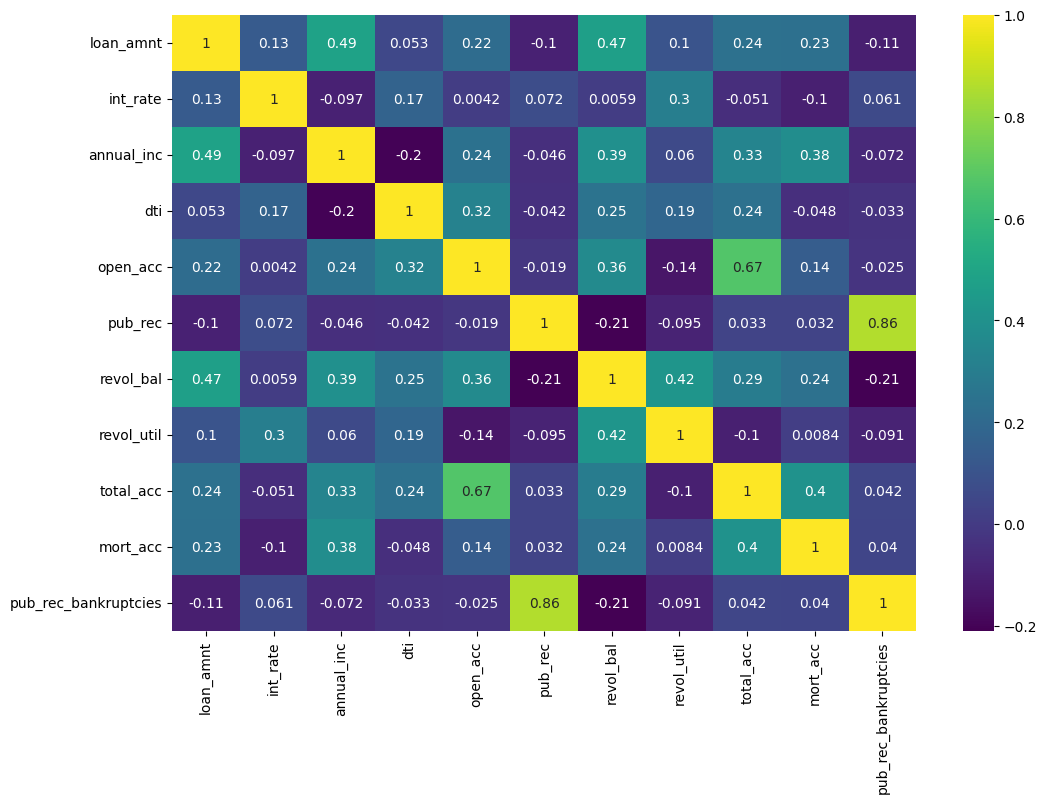

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The no of people those who have fully paid are 318357 and that of Charged O are
77673.


In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


The majority of people have home ownership as Mortgage and Rent

In [ ]:
# lets consider other,none,any as other category
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


In [ ]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['issue_d_month']=df['issue_d'].dt.month
df['issue_d_year']=df['issue_d'].dt.year

In [ ]:
df['issue_d_month'].value_counts()

,count
issue_d_month,
10,42130
7,39714
1,34682
11,34068
4,33223
8,32816
3,31919
5,31895
6,30140


Octomber was the month with max loan application issues.

In [ ]:
df['issue_d_year'].value_counts()

,count
issue_d_year,
2014,102860
2013,97662
2015,94264
2012,41202
2016,28088
2011,17435
2010,9258
2009,3826
2008,1240


In [ ]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_month']=df['earliest_cr_line'].dt.month
df['earliest_cr_line_year']=df['earliest_cr_line'].dt.year

In [ ]:
df.title.head(10)

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance
5,Debt consolidation
6,Home improvement
7,No More Credit Cards
8,Debt consolidation
9,Debt Consolidation


Seems like the case is not taken into consideration, Lets correct it!

In [ ]:
df['title']=df['title'].str.lower()
df['title'].head(10)
df['title']=df['title'].str.replace('&','and')
df['title']=df['title'].str.replace(' ', '')

In [ ]:
df['title'].value_counts()[:10]

,count
title,
debtconsolidation,169184
creditcardrefinancing,51807
homeimprovement,17292
other,12995
consolidation,5862
majorpurchase,5016
debtconsolidationloan,3632
business,3033
medicalexpenses,2825


##Univariant Analysis

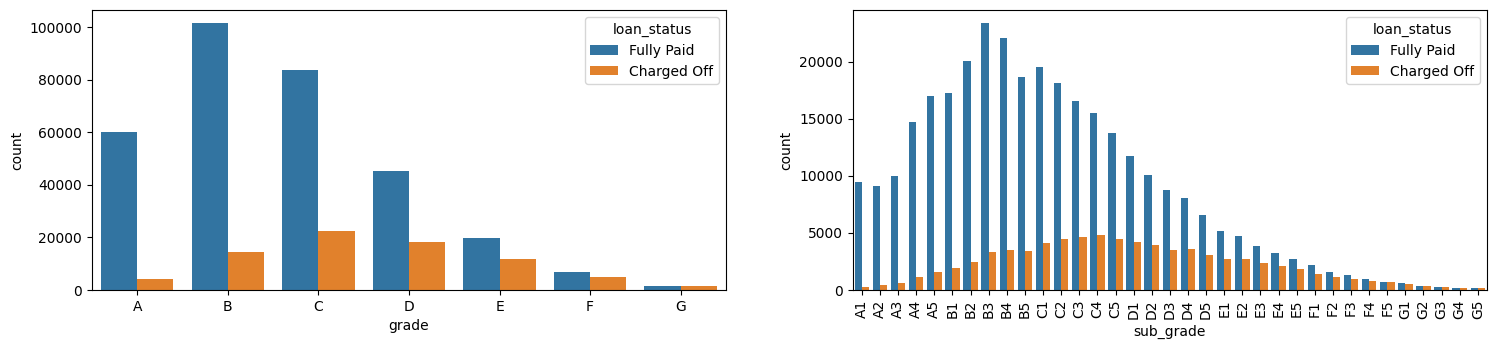

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.countplot(x=df['grade'], hue=df['loan_status'], data=df, order=sorted(df['grade']))
plt.subplot(2,2,2)
sns.countplot(x=df['sub_grade'], hue=df['loan_status'], data=df, order=sorted(df['sub_grade']))
plt.xticks(rotation=90)
plt.show()

The grade of majority of people those who have fully paid the loan is 'B' and have subgrade
'B3'.

So from where we can infer that people with grade 'B' and subgrade 'B3' are more likely to
fully pay the loan.

<Axes: xlabel='term', ylabel='count'>

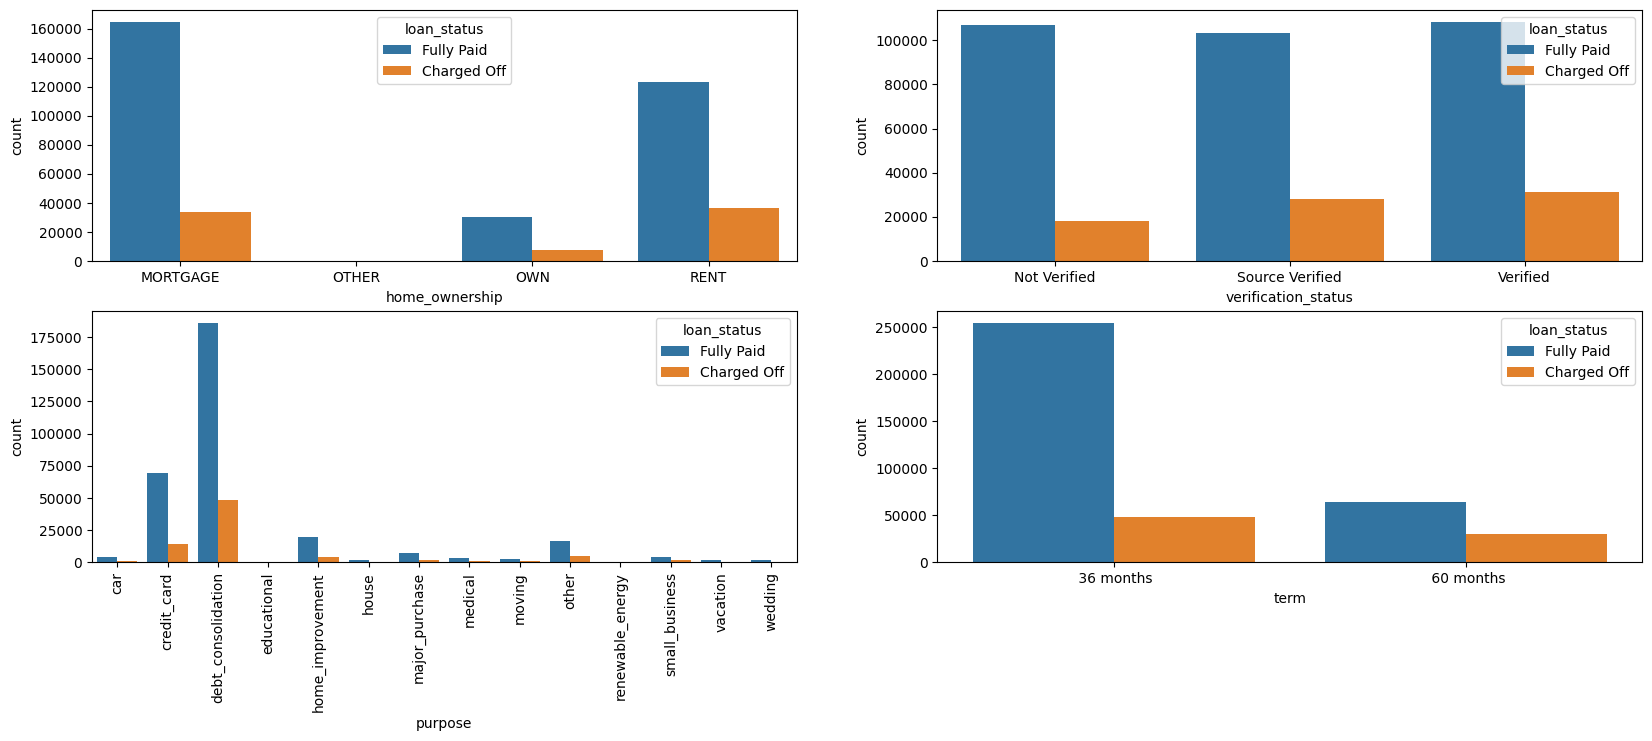

In [ ]:
# lets perform some more univarient analysis
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.countplot(x=df['home_ownership'], hue=df['loan_status'], data=df, order=sorted(df['home_ownership']))
plt.subplot(4,2,2)
sns.countplot(x=df['verification_status'], hue=df['loan_status'], data=df, order=sorted(df['verification_status']))
plt.subplot(4,2,3)
sns.countplot(x=df['purpose'], hue=df['loan_status'], data=df, order=sorted(df['purpose']))
plt.xticks(rotation=90)
plt.subplot(4,2,4)
sns.countplot(x=df['term'], hue=df['loan_status'], data=df, order=sorted(df['term']))

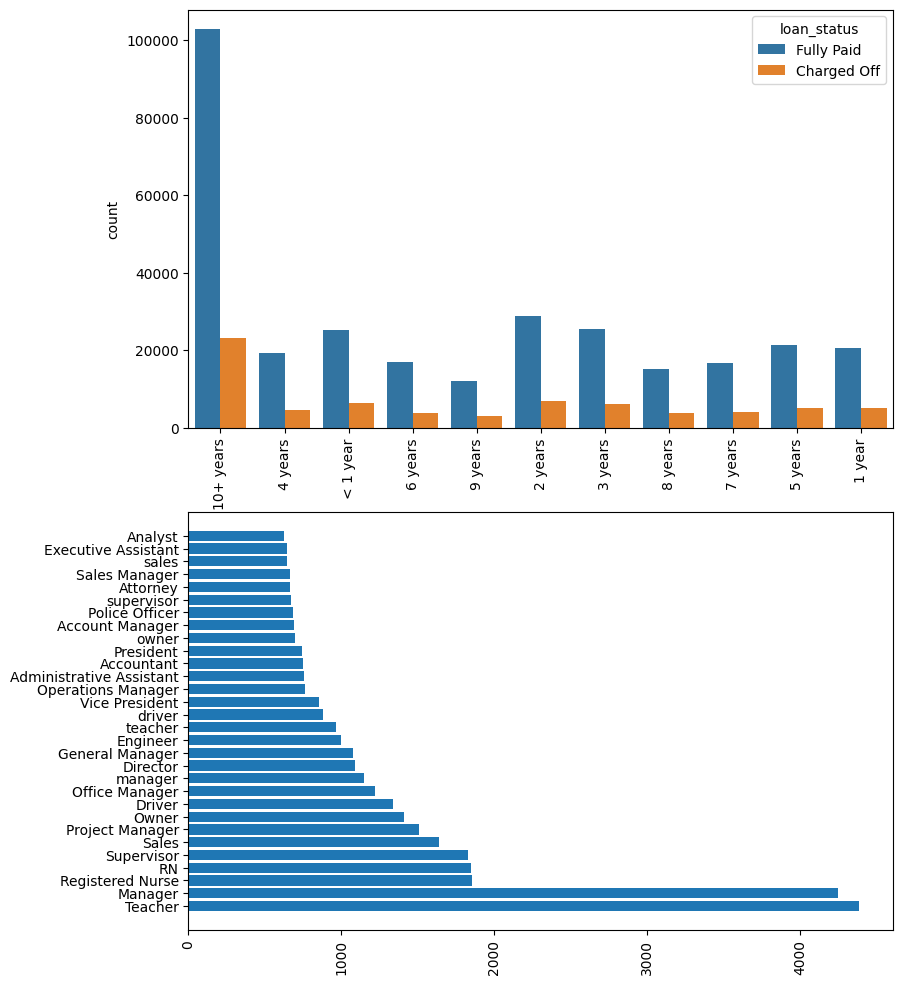

In [ ]:
# let's explore employement data of borrower
plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.countplot(x=df['emp_length'], hue=df['loan_status'], data=df)
plt.xticks(rotation=90)
plt.subplot(4,2,3)
# sns.countplot(x=df['emp_title'], hue=df['loan_status'], data=df)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30].values)
plt.xticks(rotation=90)
plt.show()

##Feature Engineering

Let's do feature engineering

In [ ]:
def pub_rec(n):
  if n==0:
    return 0
  elif n>=1:
    return 1
  else:
    return n

In [ ]:
def mort_acc(n):
  if n==0:
    return 0
  elif n>=1:
    return 1
  else:
    return n

In [ ]:
def pub_rec_bankruptcies(n):
  if n==0:
    return 0
  elif n>=1:
    return 1
  else:
    return n

In [ ]:
df['pub_rec']=df['pub_rec'].apply(pub_rec)
df['mort_acc']=df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

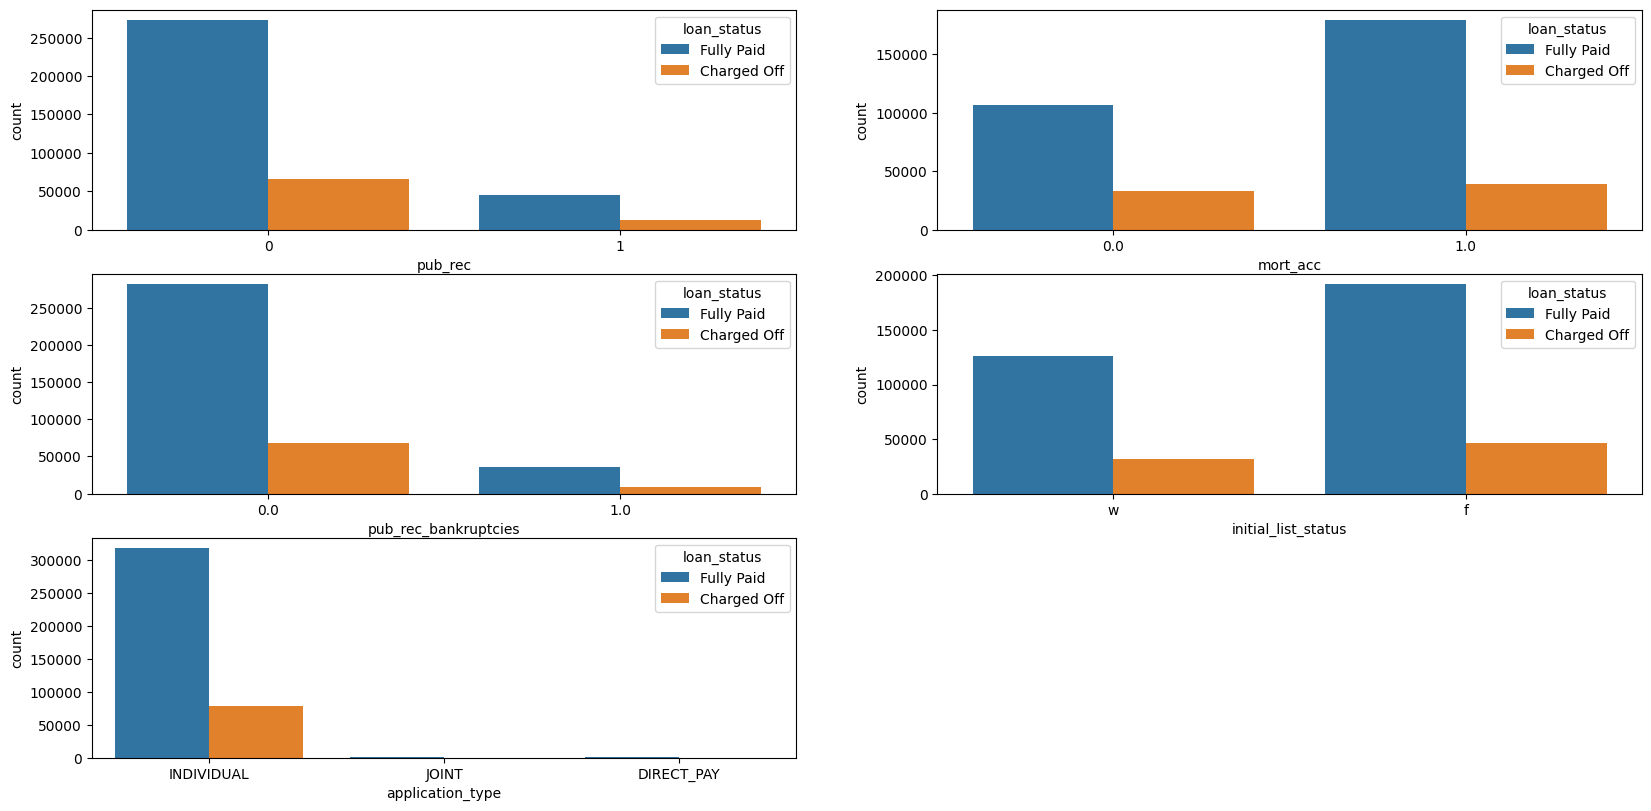

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(6,2,1)
sns.countplot(x=df['pub_rec'], hue=df['loan_status'], data=df)
plt.subplot(6,2,2)
sns.countplot(x=df['mort_acc'], hue=df['loan_status'], data=df)
plt.subplot(6,2,3)
sns.countplot(x=df['pub_rec_bankruptcies'], hue=df['loan_status'], data=df)
plt.subplot(6,2,4)
sns.countplot(x=df['initial_list_status'], hue=df['loan_status'], data=df)
plt.subplot(6,2,5)
sns.countplot(x=df['application_type'], hue=df['loan_status'], data=df)
plt.show()

In [ ]:
df['loan_status'] = df.loan_status.map({'Fully Paid':0,'Charged Off':1})

In [ ]:
df['loan_status'].unique()

array([0, 1])

In [ ]:
df.isnull().sum()/len(df)*100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


Imputation:

In [ ]:
df.groupby('total_acc')['mort_acc'].median()

,mort_acc
total_acc,
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
7.0,0.0
8.0,0.0
9.0,0.0
10.0,0.0


In [ ]:
Impute = df.groupby(by='total_acc').mort_acc.median()

In [ ]:
def impute_mort_acc(total_acc,mort_acc):
    if pd.isnull(mort_acc):
        return Impute[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df[['total_acc', 'mort_acc']].apply(lambda x: impute_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
df.isnull().sum()/len(df)*100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [ ]:
# these 4-5 % null values can be droped
df.dropna(inplace=True)

In [ ]:
df.shape

(370621, 31)

Handling outliers:

In [ ]:
num_df = df.select_dtypes(include=np.number)
num_cols = num_df.columns

In [ ]:
len(num_cols)

17

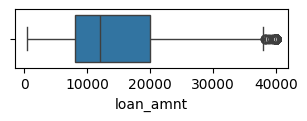

Skewness:  0.7639742897221132
Kurtosis:  -0.08619391611496674
Mean:  14250.184487657203
Median:  12000.0
Mode:  0    10000.0
Name: loan_amnt, dtype: float64
Standard Deviation:  8357.785097492906


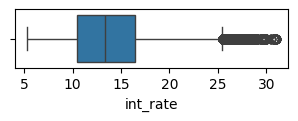

Skewness:  0.42102751322310544
Kurtosis:  -0.14451906468397668
Mean:  13.637437193251328
Median:  13.33
Mode:  0    10.99
Name: int_rate, dtype: float64
Standard Deviation:  4.471626037652381


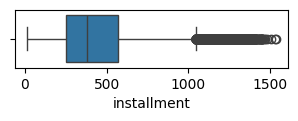

Skewness:  0.9729727061619405
Kurtosis:  0.7611078666558195
Mean:  435.2181839399279
Median:  379.19
Mode:  0    327.34
Name: installment, dtype: float64
Standard Deviation:  250.35894994479378


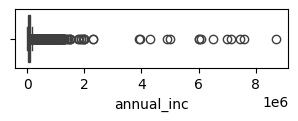

Skewness:  42.46652003727692
Kurtosis:  4385.375257511794
Mean:  75187.8719837516
Median:  65000.0
Mode:  0    60000.0
Name: annual_inc, dtype: float64
Standard Deviation:  62090.2567072765


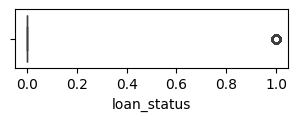

Skewness:  1.5617829851985314
Kurtosis:  0.43916846273249677
Mean:  0.19226649326400824
Median:  0.0
Mode:  0    0
Name: loan_status, dtype: int64
Standard Deviation:  0.39408185426494335


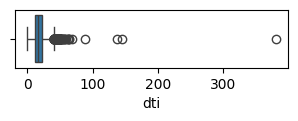

Skewness:  0.5151246432633173
Kurtosis:  10.73893905585221
Mean:  17.337371897437
Median:  16.9
Mode:  0    19.2
Name: dti, dtype: float64
Standard Deviation:  8.103812741902834


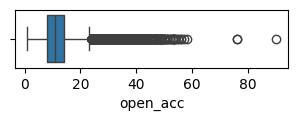

Skewness:  1.2130796582457442
Kurtosis:  2.9813132503898454
Mean:  11.393337128764966
Median:  11.0
Mode:  0    9.0
Name: open_acc, dtype: float64
Standard Deviation:  5.146308653781589


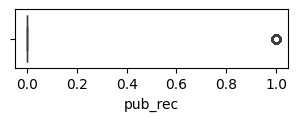

Skewness:  2.0599840420129114
Kurtosis:  2.2435463602762975
Mean:  0.1412629073905688
Median:  0.0
Mode:  0    0
Name: pub_rec, dtype: int64
Standard Deviation:  0.3482930170086575


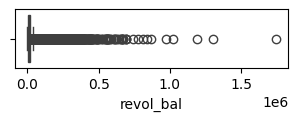

Skewness:  11.703974607109101
Kurtosis:  388.7607654293676
Mean:  15950.622946352203
Median:  11303.0
Mode:  0    0.0
Name: revol_bal, dtype: float64
Standard Deviation:  20538.93355364032


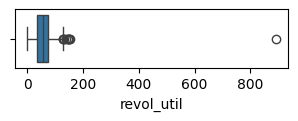

Skewness:  -0.06940048137936138
Kurtosis:  2.988814223615227
Mean:  53.991221868161816
Median:  55.0
Mode:  0    0.0
Name: revol_util, dtype: float64
Standard Deviation:  24.39001028427167


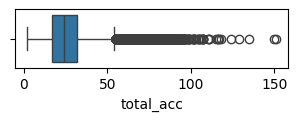

Skewness:  0.8614857628180032
Kurtosis:  1.2067950029563819
Mean:  25.51850272920315
Median:  24.0
Mode:  0    22.0
Name: total_acc, dtype: float64
Standard Deviation:  11.886703480160397


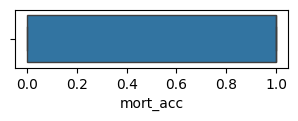

Skewness:  -0.4617115061839014
Kurtosis:  -1.7868321274550112
Mean:  0.6124693419962711
Median:  1.0
Mode:  0    1.0
Name: mort_acc, dtype: float64
Standard Deviation:  0.4871871175708681


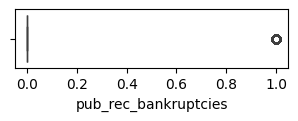

Skewness:  2.4941923840105464
Kurtosis:  4.221018426512664
Mean:  0.10992091651579376
Median:  0.0
Mode:  0    0.0
Name: pub_rec_bankruptcies, dtype: float64
Standard Deviation:  0.31279158015187913


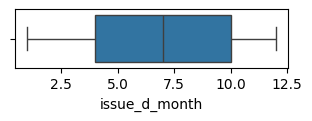

Skewness:  -0.05954221934127928
Kurtosis:  -1.1956097753170765
Mean:  6.570458770549969
Median:  7.0
Mode:  0    10
Name: issue_d_month, dtype: int32
Standard Deviation:  3.4151744076511767


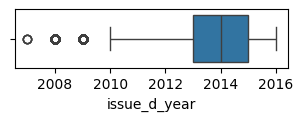

Skewness:  -0.7381161931961531
Kurtosis:  0.6771533739653965
Mean:  2013.6321956931745
Median:  2014.0
Mode:  0    2014
Name: issue_d_year, dtype: int32
Standard Deviation:  1.459801130587289


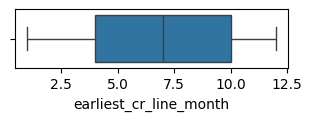

Skewness:  -0.1322557931311464
Kurtosis:  -1.1998761839640544
Mean:  6.762223403422904
Median:  7.0
Mode:  0    10
Name: earliest_cr_line_month, dtype: int32
Standard Deviation:  3.4330609125952476


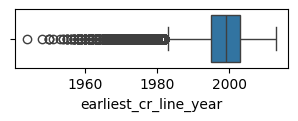

Skewness:  -1.008461910523381
Kurtosis:  1.571312612759201
Mean:  1998.1156275548337
Median:  1999.0
Mode:  0    2000
Name: earliest_cr_line_year, dtype: int32
Standard Deviation:  6.931353719978875


In [ ]:
def box_plot(col,i):
  plt.figure(figsize=(12, 8))
  plt.subplot(9,3,i)
  sns.boxplot(x=df[col])
  plt.show()
  print('Skewness: ',df[col].skew())
  print('Kurtosis: ',df[col].kurt())
  print('Mean: ',df[col].mean())
  print('Median: ',df[col].median())
  print('Mode: ',df[col].mode())
  print('Standard Deviation: ',df[col].std())
  i+=1

for col in num_cols:
  box_plot(col,1)

In [ ]:
for col in num_cols:
  mean = df[col].mean()
  std = df[col].std()

  upper_lim = mean + 3*std
  lower_lim = mean - 3*std

  df = df[(df[col] > lower_lim) & (df[col] < upper_lim)]
df.shape

(342270, 31)

Data processing

In [ ]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})
df['initial_list_status'] = df['initial_list_status'].map({'w':0,'f':1})


In [ ]:
df['zip_code'] = df['address'].str[-5:]

In [ ]:
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade','address', 'earliest_cr_line', 'emp_length'], axis=1, inplace=True)


In [ ]:
df.shape

(342270, 25)

In [ ]:
dumies = ['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']


In [ ]:
df = pd.get_dummies(df, columns=dumies, drop_first=True)

In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,1,2015,6,1990,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,1,2015,7,2004,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,1,2015,8,2007,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,11,2014,9,2006,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,4,2013,3,1999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False
5,20000.0,36,13.33,677.07,86788.0,0,16.31,8.0,0,25757.0,100.6,23.0,1,1.0,0.0,9,2015,1,2005,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False
6,18000.0,36,5.32,542.07,125000.0,0,1.36,8.0,0,4178.0,4.9,25.0,1,1.0,0.0,9,2015,8,2005,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
7,13000.0,36,11.14,426.47,46000.0,0,26.87,11.0,0,13425.0,64.5,15.0,1,0.0,0.0,9,2012,9,1994,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
8,18900.0,60,10.99,410.84,103000.0,0,12.52,13.0,0,18637.0,32.9,40.0,0,1.0,0.0,10,2014,6,1994,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True
9,26300.0,36,16.29,928.40,115000.0,0,23.69,13.0,0,22171.0,82.4,37.0,1,1.0,0.0,4,2012,12,1997,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [ ]:
df.shape

(342270, 54)

##Data Preparation for Modeling -


In [ ]:
X_trian = df.drop('loan_status', axis=1)
y_train = df['loan_status']

In [ ]:
from re import X
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trian, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(273816, 53) (68454, 53) (273816,) (68454,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy of model: ', round(accuracy_score(y_test, y_pred)*100,2),'%')

Accuracy of model:  89.02 %


In [ ]:
confusion_matrix(y_test, y_pred)

array([[54804,   376],
       [ 7138,  6136]])

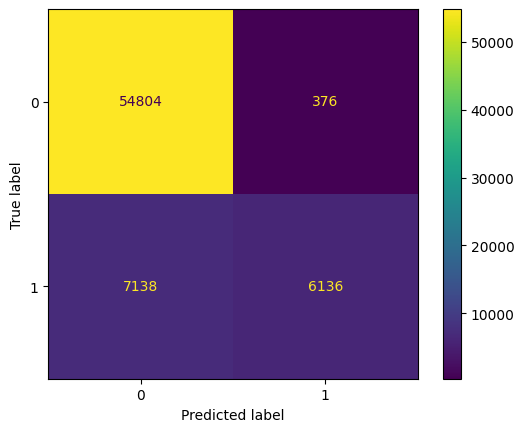

In [ ]:
import  seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     55180
           1       0.94      0.46      0.62     13274

    accuracy                           0.89     68454
   macro avg       0.91      0.73      0.78     68454
weighted avg       0.90      0.89      0.87     68454



##ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [ ]:
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

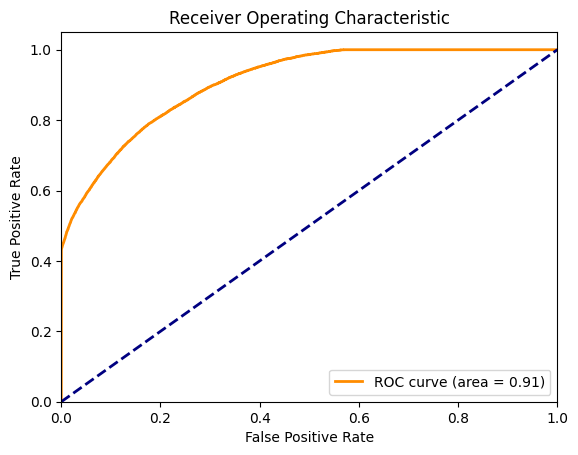

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.7277214903893912

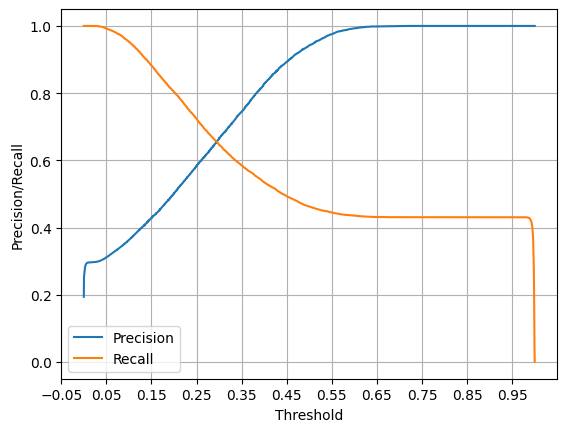

In [ ]:
precisions, recall, threshold = precision_recall_curve(y_test, y_probs)

threshold_boundary = threshold.shape[0]

plt.plot(threshold, precisions[:threshold_boundary], label='Precision')
plt.plot(threshold, recall[:threshold_boundary], label='Recall')

start, end = plt.xlim()
plt.xticks(np.arange(start, end, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.grid()
plt.show()

##KFold

In [ ]:
X = scaler.fit_transform(df.drop('loan_status', axis=1))
y = df['loan_status']
kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(model, X, y, cv=kfold, scoring='accuracy'))
print("Cross Validation accuracy: {:.3f}".format(accuracy))


Cross Validation accuracy: 0.891


##Oversampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res[y_train_res==1])))
print("After OverSampling, counts of label '0': {}".format(y_train_res.shape[0] - sum(y_train_res[y_train_res==1])))

After OverSampling, the shape of train_X: (442064, 53)
After OverSampling, the shape of train_y: (442064,) 

After OverSampling, counts of label '1': 221032
After OverSampling, counts of label '0': 221032
